In [3]:
# Install PyTorch if needed
# !pip install torch torchvision

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [4]:
# Device configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Hyperparameters
latent_size = 100
hidden_size = 256
image_size = 28*28  # 784
batch_size = 128
num_epochs = 50
learning_rate = 0.0002

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))  # Normalize to [-1, 1]
])

Using device: cuda


In [5]:
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)

In [6]:
# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(True),
            nn.Linear(hidden_size, image_size),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.fc(z)
        return out

In [7]:
# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.fc(x)
        return out

In [8]:
# Initialize models
G = Generator().to(device)
D = Discriminator().to(device)

In [9]:
# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(D.parameters(), lr=learning_rate)

In [10]:
# Labels
real_label = 1
fake_label = 0

Epoch [1/50]  D_loss: 0.0912  G_loss: 4.8854
Epoch [2/50]  D_loss: 0.3965  G_loss: 3.9390
Epoch [3/50]  D_loss: 0.5355  G_loss: 3.7026
Epoch [4/50]  D_loss: 0.9920  G_loss: 1.9963
Epoch [5/50]  D_loss: 0.5193  G_loss: 2.6250
Epoch [6/50]  D_loss: 0.7493  G_loss: 1.5951
Epoch [7/50]  D_loss: 0.3532  G_loss: 3.0142
Epoch [8/50]  D_loss: 0.3013  G_loss: 3.2452
Epoch [9/50]  D_loss: 0.3892  G_loss: 5.2750
Epoch [10/50]  D_loss: 0.1263  G_loss: 4.9984


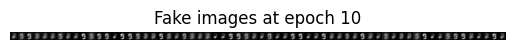

Epoch [11/50]  D_loss: 0.3045  G_loss: 3.8070
Epoch [12/50]  D_loss: 0.5760  G_loss: 2.9830
Epoch [13/50]  D_loss: 0.2106  G_loss: 3.4689
Epoch [14/50]  D_loss: 0.1651  G_loss: 6.1606
Epoch [15/50]  D_loss: 0.1014  G_loss: 5.5221
Epoch [16/50]  D_loss: 0.1682  G_loss: 5.1914
Epoch [17/50]  D_loss: 0.1881  G_loss: 5.8275
Epoch [18/50]  D_loss: 0.4179  G_loss: 7.1052
Epoch [19/50]  D_loss: 0.5303  G_loss: 3.0076
Epoch [20/50]  D_loss: 0.3010  G_loss: 4.7423


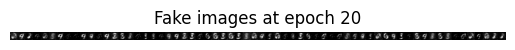

Epoch [21/50]  D_loss: 0.1004  G_loss: 4.5612
Epoch [22/50]  D_loss: 0.3390  G_loss: 4.7288
Epoch [23/50]  D_loss: 0.2158  G_loss: 4.7062
Epoch [24/50]  D_loss: 0.2150  G_loss: 4.1203
Epoch [25/50]  D_loss: 0.2470  G_loss: 5.1906
Epoch [26/50]  D_loss: 0.2588  G_loss: 4.9126
Epoch [27/50]  D_loss: 0.1689  G_loss: 4.4940
Epoch [28/50]  D_loss: 0.1793  G_loss: 5.1552
Epoch [29/50]  D_loss: 0.2559  G_loss: 6.7083
Epoch [30/50]  D_loss: 0.1386  G_loss: 5.2022


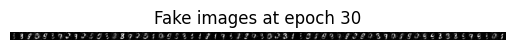

Epoch [31/50]  D_loss: 0.3511  G_loss: 5.5207
Epoch [32/50]  D_loss: 0.3212  G_loss: 3.1916
Epoch [33/50]  D_loss: 0.3501  G_loss: 5.0017
Epoch [34/50]  D_loss: 0.1940  G_loss: 6.3480
Epoch [35/50]  D_loss: 0.4026  G_loss: 4.9218
Epoch [36/50]  D_loss: 0.2944  G_loss: 3.7291
Epoch [37/50]  D_loss: 0.6050  G_loss: 3.6680
Epoch [38/50]  D_loss: 0.3551  G_loss: 4.5128
Epoch [39/50]  D_loss: 0.3386  G_loss: 4.8847
Epoch [40/50]  D_loss: 0.1674  G_loss: 4.3845


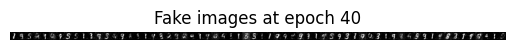

Epoch [41/50]  D_loss: 0.6850  G_loss: 3.1043
Epoch [42/50]  D_loss: 0.5346  G_loss: 3.4447
Epoch [43/50]  D_loss: 0.4345  G_loss: 2.7779
Epoch [44/50]  D_loss: 0.6558  G_loss: 2.4769
Epoch [45/50]  D_loss: 0.2697  G_loss: 3.1289
Epoch [46/50]  D_loss: 0.3734  G_loss: 4.3708
Epoch [47/50]  D_loss: 0.4014  G_loss: 4.5920
Epoch [48/50]  D_loss: 0.4268  G_loss: 3.4901
Epoch [49/50]  D_loss: 0.3899  G_loss: 3.9055
Epoch [50/50]  D_loss: 0.4143  G_loss: 3.2193


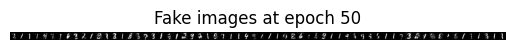

In [11]:
# Training loop
for epoch in range(num_epochs):
    for (images, _) in data_loader:
        images = images.reshape(-1, image_size).to(device)

        # Train Discriminator
        real_outputs = D(images)
        real_loss = criterion(real_outputs.squeeze(), torch.ones(images.size(0), device=device))

        z = torch.randn(images.size(0), latent_size, device=device)
        fake_images = G(z)
        fake_outputs = D(fake_images.detach())
        fake_loss = criterion(fake_outputs.squeeze(), torch.zeros(images.size(0), device=device))

        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        z = torch.randn(images.size(0), latent_size, device=device)
        fake_images = G(z)
        outputs = D(fake_images)
        g_loss = criterion(outputs.squeeze(), torch.ones(images.size(0), device=device))

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")

    # Save sample fake images
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(64, latent_size, device=device)
            fake_images = G(z)
            fake_images = fake_images.reshape(-1, 1, 28, 28)
            grid = torch.cat([img for img in fake_images], dim=2)
            plt.imshow(grid[0].cpu().numpy(), cmap='gray')
            plt.title(f"Fake images at epoch {epoch+1}")
            plt.axis('off')
            plt.show()


In [15]:
import torchvision

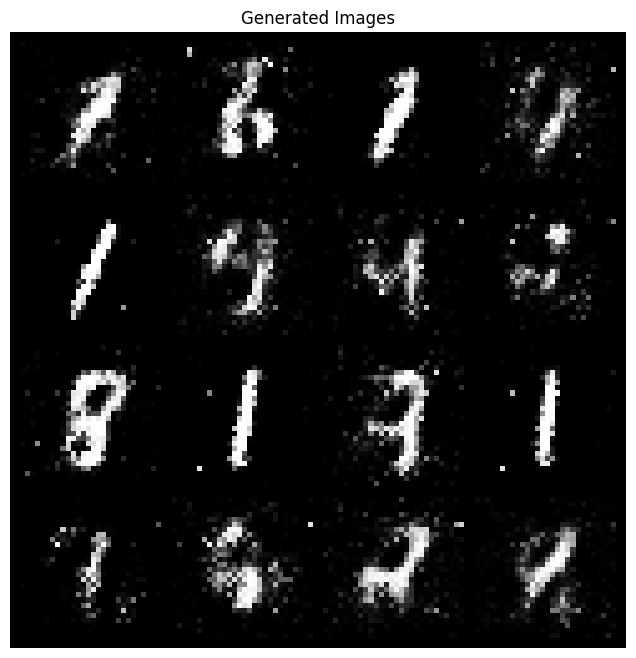

In [19]:
# Function to generate and display fake images from random noise
def generate_images(generator, num_images=16, latent_size=100, image_size=28):
    generator.eval()  # Set model to evaluation mode

    with torch.no_grad():
        # Generate random noise (latent space) and pass it through the generator
        z = torch.randn(num_images, latent_size, device=device)  # Correct latent_size
        fake_images = generator(z)

        # Reshape generated images for display (batch_size, 1, 28, 28)
        fake_images = fake_images.view(-1, 1, 28, 28)

        # Create a grid of generated images
        grid = torchvision.utils.make_grid(fake_images, nrow=4, normalize=True, scale_each=True)

        # Display the grid of fake images
        plt.figure(figsize=(8,8))
        plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
        plt.title("Generated Images")
        plt.axis('off')
        plt.show()

# Now call this function after training the GAN
generate_images(G, num_images=16, latent_size=100, image_size=28)  # Latent size should match Generator's expectation

